# Best Neighborhood to Play In Real-Life Mario Kart
### By: Maanya, Matthew, Michael

![luigi](https://media.giphy.com/media/xUOxeSmFd00VhzqHQY/giphy.gif)

In [1]:
#Import all necesities to read and display the data
import pandas as pd
import geopandas
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt 
from math import radians, sin, cos, sin, asin, sqrt, pi

## Metric: Traffic Congestion Per Neighborhood
---

Traffic is a key factor in determining which neighborhood would be best suited for playing Mario Kart. High traffic congestion will only slow us down and make it impossible to get a good placement in the race. In choosing a neighborhood we will be looking for neighborhoods with the least traffic flow, allowing us for easy usage of the roads, with no competition. 

In [3]:
#Create initial file for reading the traffic data
TrafficCount = pd.read_csv("CSV/TrafficCount.csv")

#Display initial table for the data
TrafficCount.head()

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15


In [4]:
#Create a table that has each neighborhood with their daily car traffic
TrafficCountPerNeighborhood = TrafficCount[["neighborhood", "average_daily_car_traffic"]]
TrafficCountPerNeighborhood.head()

,neighborhood,average_daily_car_traffic
0,Polish Hill,4949.0
1,Central Lawrenceville,NaN
2,Windgap,NaN
3,Squirrel Hill South,2741.0
4,Perry North,NaN


In [5]:
#We have multiple averages for different neighborhoods, so we want to combine them all together and average their averages
AverageTPN = TrafficCountPerNeighborhood.groupby("neighborhood").mean()

AverageTPN = AverageTPN.rename(columns = {"average_daily_car_traffic" : "Average Daily Car Traffic"})
AverageTPN.head()

,Average Daily Car Traffic
neighborhood,
Allegheny Center,2386.000000
Allegheny West,477.000000
Arlington,2285.500000
Banksville,NaN
Beechview,1418.333333


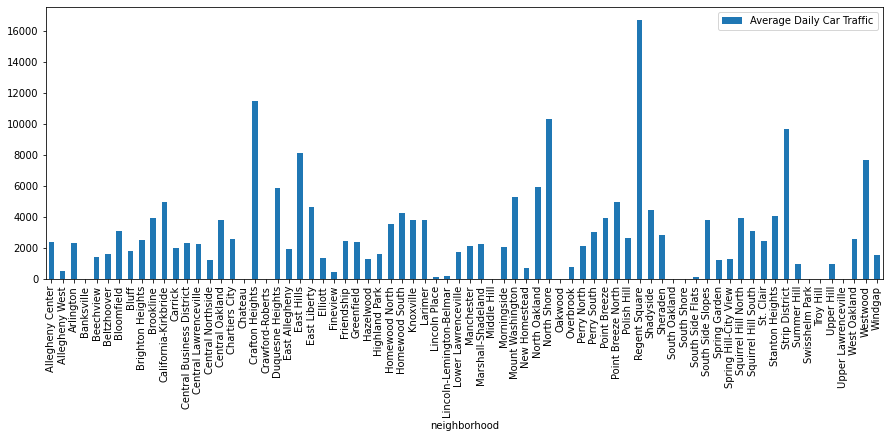

In [6]:
#Lets graph this out with a bar graph to see some inital findings
AverageTPN.plot.bar(figsize=(15,5))

As we can see here some neighborhoods have extremely high traffic flows, and others have none. The areas with no traffic flow are most likely caused by a lack of tracking data, but some of the high value areas are not caused solely by high congestion, but because of the amount of people living there.

In [7]:
#Import data set for population
Population = pd.read_csv("CSV/total-population.csv")
Population = Population[["Neighborhood", "Estimate; Total"]]

#Rename for clarification
Population = Population.rename(columns = {"Estimate; Total" : "Total Population"})
AverageTPN = AverageTPN.reset_index()
AverageTPN = AverageTPN.rename(columns = {"neighborhood" : "Neighborhood"})

Population.sample(5)

,Neighborhood,Total Population
8,Beltzhoover,1702.0
40,Homewood North,3371.0
79,Stanton Heights,4761.0
16,Central Business District,4060.0
60,Overbrook,3682.0


In [8]:
#Merge the two dataframes to become one table
TrafficAndPop = AverageTPN.merge(Population, how="right", on="Neighborhood")
TrafficAndPop.head()

,Neighborhood,Average Daily Car Traffic,Total Population
0,Allegheny Center,2386.000000,1411.0
1,Allegheny West,477.000000,343.0
2,Arlington,2285.500000,1852.0
3,Banksville,NaN,3858.0
4,Beechview,1418.333333,8078.0


Now that we have the populaton and traffic flow in one dataframe, we can divide the two and multiply by 12 (because there are 12 racers in each race) to get the average car flow per 12 people.

In [9]:
#Now let's create a new column for the flow per 12 people
TrafficAndPop["Traffic Flow Per 12 People"] = TrafficAndPop["Average Daily Car Traffic"] / TrafficAndPop["Total Population"] * 12
TrafficAndPop.sample(5)

,Neighborhood,Average Daily Car Traffic,Total Population,Traffic Flow Per 12 People
47,Perry North,2123.777778,3771.0,6.758243
24,Elliott,1342.666667,2491.0,6.468085
51,Polish Hill,2649.000000,1331.0,23.882795
11,Carrick,1969.571429,10122.0,2.334999
75,Arlington Heights,NaN,272.0,NaN


We eventually want to get to displaying the traffic flow per 12 people over a map of all of the neighborhoods, so let's single out the Neighborhood and Traffic Flow columns.

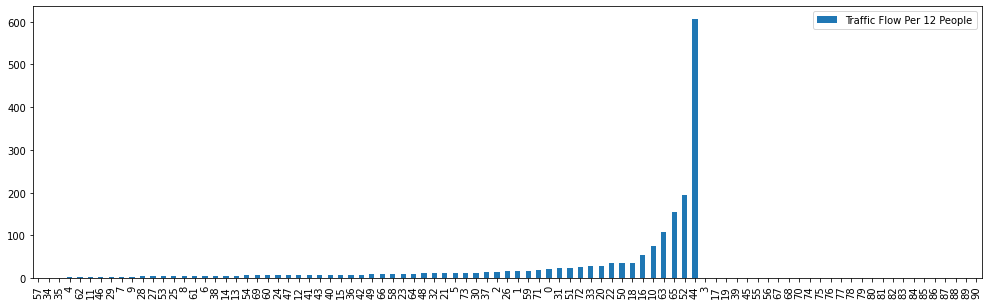

In [10]:
TrafficFlow = pd.DataFrame(TrafficAndPop[["Neighborhood", "Traffic Flow Per 12 People"]].sort_values(by = "Traffic Flow Per 12 People"))
TrafficFlow.plot.bar(figsize=(17, 5))

As we can see, our data has great disparities between the maximum and minimum values for the traffic flow, so when we create the map, we will use a log scale to normalize the data to make the differences more visible.

In [11]:
#Let's read in the shape file
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

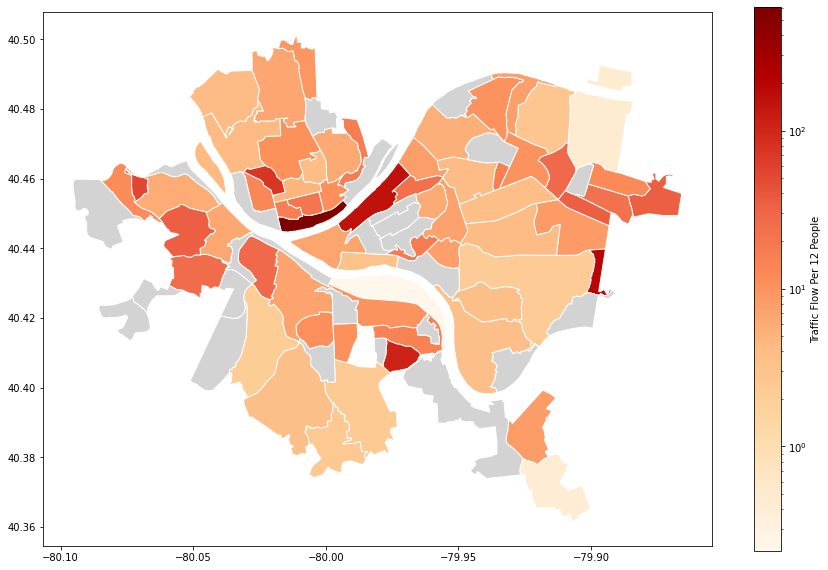

In [12]:
#Now let's format our map to insert our data
Traffic_Flow_Map = neighborhoods.merge(TrafficAndPop, how = "left", left_on = "hood", right_on = "Neighborhood")
Traffic_Flow_Map.plot(column= "Traffic Flow Per 12 People", 
               cmap= "OrRd",              
               edgecolor="white",        
               legend=True,             
               legend_kwds={'label': "Traffic Flow Per 12 People"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"},
               norm = matplotlib.colors.LogNorm(vmin = Traffic_Flow_Map["Traffic Flow Per 12 People"].min(), vmax = Traffic_Flow_Map["Traffic Flow Per 12 People"].max())
               )

By this map, we can see that areas further away from the center of the city generally have lower traffic flows and thus will allow for better racing.

In [13]:
#Look at the definite lowest values for the traffic flow
TrafficAndPop.sort_values(by="Traffic Flow Per 12 People").head(10)

,Neighborhood,Average Daily Car Traffic,Total Population,Traffic Flow Per 12 People
57,South Side Flats,115.000000,6292.0,0.219326
34,Lincoln Place,126.000000,3499.0,0.432123
35,Lincoln-Lemington-Belmar,195.000000,4955.0,0.472250
4,Beechview,1418.333333,8078.0,2.106957
62,Squirrel Hill South,3050.076923,16042.0,2.281569
11,Carrick,1969.571429,10122.0,2.334999
46,Overbrook,777.000000,3682.0,2.532319
29,Highland Park,1564.733333,6810.0,2.757239
7,Bluff,1788.333333,6294.0,3.409596
9,Brookline,3914.400000,13160.0,3.569362


By being able to collect the average car traffic counts for each neighborhood, comparing it to population counts of each neighborhood, I was able to determine which neighborhoods would be the least congested traffic-wise and would be best suited for real life Mario Kart.

Our top three Pittsburgh neighborhoods based on traffic congestion per 12 people were:

1. South Side Flats with a 0.22 flow ratio
2. Lincoln Place with a 0.43 flow ratio
3. Lincoln-Lemington-Belmar with a 0.47 flow ratio
4. Beechview with 2.11 flow ratio
5. Squirrel Hill South 2.28 flow ratio

## Metric: No Parking/Keep Moving Per Neighborhood
---

In [3]:
traffic_signs = pd.read_csv("CSV/traffic_signs.csv") 
traffic_signs.head()

,id,mutcd_code,address_number,street,city,mounting_fixture,date_installed,description,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1673225887,R1-1,900,California Ave,Pittsburgh,Wood Pole,NaN,Stop,California-Kirkbride,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-9,40.459325,-80.019057
1,668379452,R1-1,107,Glenbury St,Pittsburgh,Channel,NaN,Stop,Overbrook,4.0,32.0,4.200332e+10,5.0,32.0,3.0,4-25,40.386955,-80.002161
2,174468442,R1-1,5325,Forbes Ave,Pittsburgh,Wood Pole,NaN,Stop,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.439828,-79.934814
3,1517107112,R1-1,1437,N St Clair St,Pittsburgh,Channel,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478685,-79.919270
4,1374142598,WF,228,Isabella St,Pittsburgh,Metal Pole,1995-02-14,Wayfinding Signage,North Shore,1.0,22.0,4.200356e+10,6.0,22.0,1.0,1-20,40.448482,-80.000671


In [4]:
traffic_signs["neighborhood"].value_counts()

South Side Flats             3672
Bloomfield                   3627
Central Business District    3491
Shadyside                    3370
Squirrel Hill South          3281
                             ... 
Ridgemont                      62
Chartiers City                 44
Glen Hazel                     38
Arlington Heights              21
Mount Oliver Borough           17
Name: neighborhood, Length: 91, dtype: int64

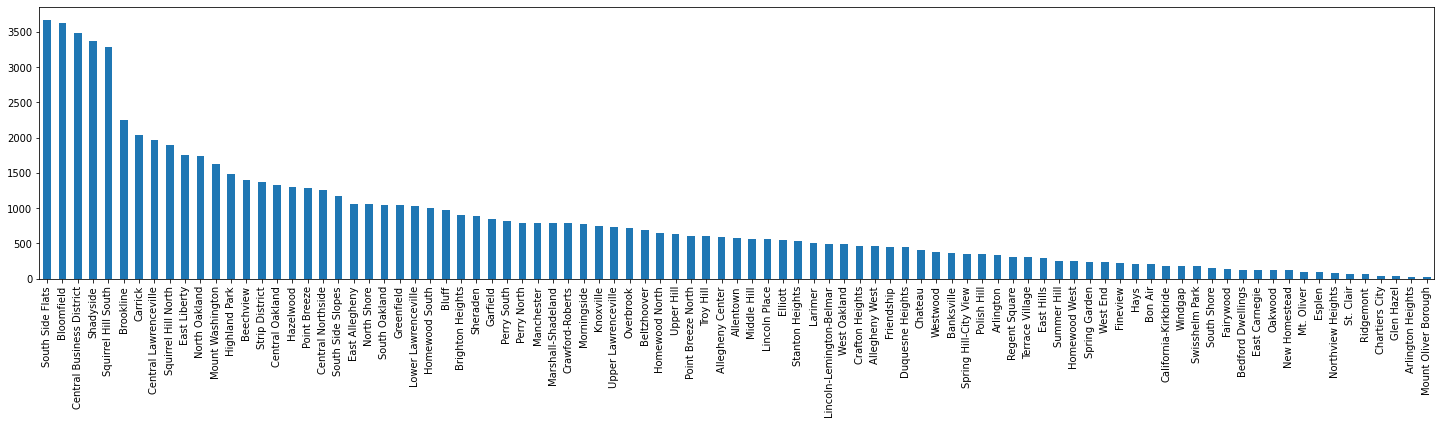

In [5]:
traffic_signs["neighborhood"].value_counts().plot.bar(figsize = (25, 5))

In [6]:
traffic_signs["neighborhood"].value_counts()

South Side Flats             3672
Bloomfield                   3627
Central Business District    3491
Shadyside                    3370
Squirrel Hill South          3281
                             ... 
Ridgemont                      62
Chartiers City                 44
Glen Hazel                     38
Arlington Heights              21
Mount Oliver Borough           17
Name: neighborhood, Length: 91, dtype: int64

In [7]:
traffic_signs["description"].value_counts()

No Parking Anytime                      10747
Stop                                     8381
Speed Limit                              4217
Handicapped Parking                      3232
No Parking Or Stopping                   2881
                                        ...  
Triple Lane Control                         1
Interpretative                              1
Road May Flood                              1
Advance Turn Arrow                          1
Begin Right Turn Lane Yield to Bikes        1
Name: description, Length: 269, dtype: int64

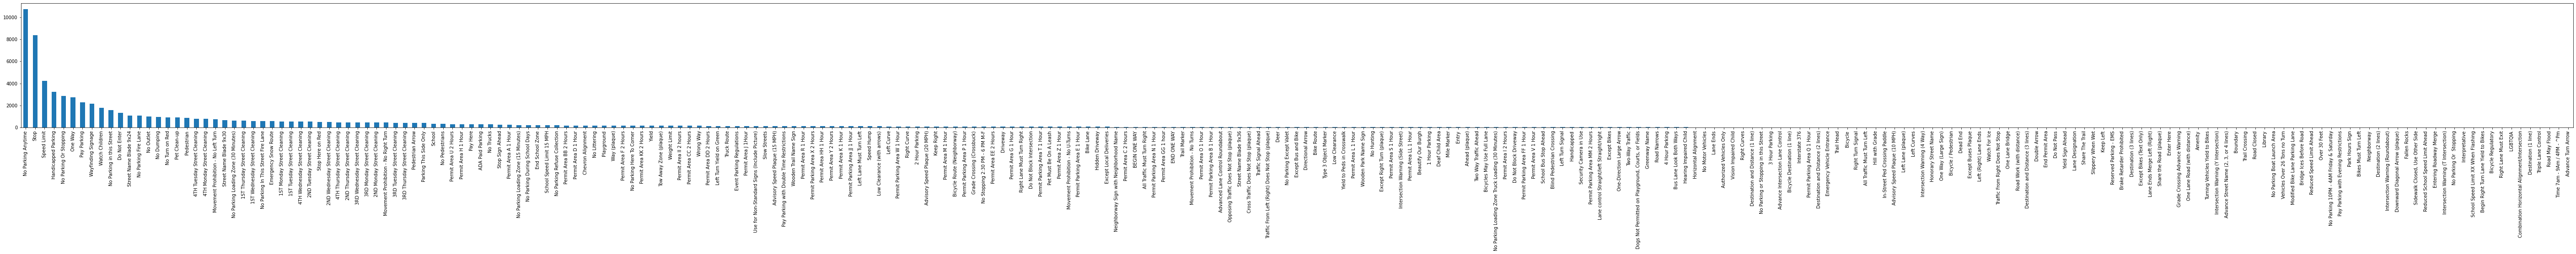

In [12]:
traffic_signs["description"].value_counts().plot.bar(figsize = (100, 5))

In [8]:
traffic_signs = traffic_signs[traffic_signs.description == "No Parking Anytime"]
traffic_signs.head()

,id,mutcd_code,address_number,street,city,mounting_fixture,date_installed,description,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
3121,1665705763,2,3086,Beechwood Blvd,Pittsburgh,Channel,NaN,No Parking Anytime,Squirrel Hill South,5.0,14.0,4.200314e+10,3.0,14.0,4.0,2-15,40.420740,-79.921614
11919,1414314960,2,806,Galveston Ave,Pittsburgh,Wood Pole,NaN,No Parking Anytime,Allegheny West,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-7,40.451276,-80.016365
15443,1876967934,2,3401,Beechwood Blvd,Pittsburgh,Wood Pole,NaN,No Parking Anytime,Greenfield,5.0,15.0,4.200315e+10,3.0,15.0,4.0,2-12,40.419713,-79.927650
15444,262421904,2,3401,Beechwood Blvd,Pittsburgh,Wood Pole,NaN,No Parking Anytime,Greenfield,5.0,15.0,4.200315e+10,3.0,15.0,4.0,2-12,40.419709,-79.927513
15445,1848491157,2,3410,Beechwood Blvd,Pittsburgh,Channel,NaN,No Parking Anytime,Greenfield,5.0,15.0,4.200315e+10,3.0,15.0,4.0,2-15,40.419748,-79.927060


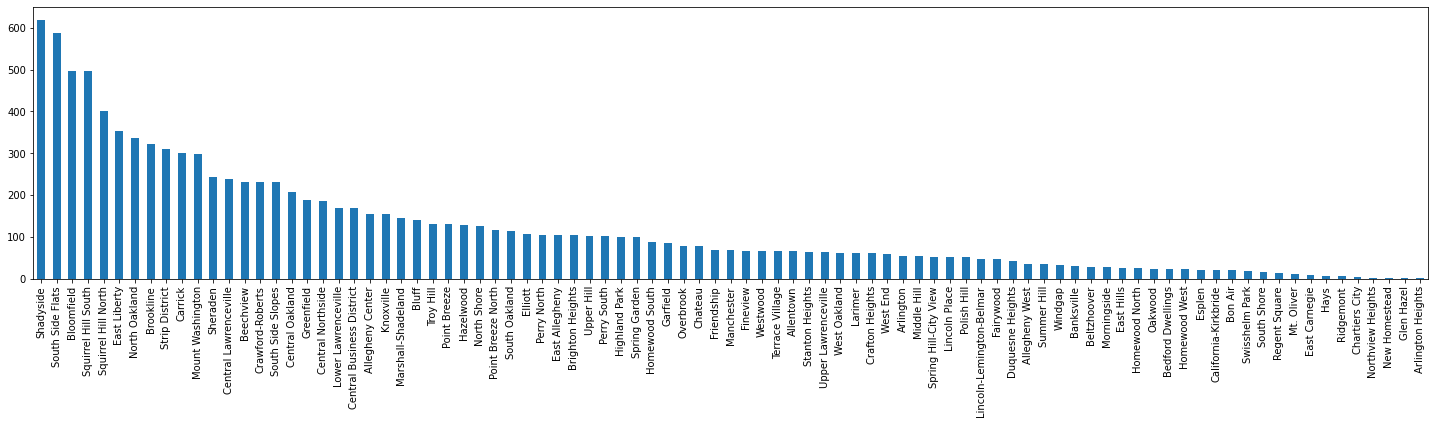

In [9]:
traffic_signs["neighborhood"].value_counts().plot.bar(figsize = (25, 5))

Conclusion:
    When determining the most efficient neighborhoods to use while playing Mario Kart, we must consider the amount of no parking signs each neighborhood contains. The reason for knowing the amount of no parking signs is to know how often one must avoiding parking areas versus where there are parked cars in the way. Determining the best neighborhood would mean a racer would have to stop the lest amount of times in order to have the most continuous race possible. The top five neighborhoods, when considering the amount of no parking signs in the neighborhood, that would be the best to play Mario Kart in would be the following:
    
    1) Shadyside
    2) South Side Flatts
    3) Bloomfield 
    4) Squirrel Hill South 
    5) Squirrel Hill North 

## Metric: Speed Humps in Neighborhoods
---

On to a more fun aspect of mario kart, that's the boost! In real life, the boost is represented as speed humps. In order to choose a neighborhood, I went ahead and looked at the number of speed humps in the dataset.

In [2]:
# import the dataset

speed_humps = pd.read_csv("CSV/speedhumps.csv")

speed_humps.head()

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355


In [4]:
# sees the number of humps in every neighborhood

speed_humps["neighborhood"].value_counts()

Squirrel Hill South    18
Carrick                 9
North Oakland           6
Polish Hill             6
Upper Hill              4
South Side Slopes       4
Homewood South          4
Brookline               4
Perry North             4
Bloomfield              3
South Side Flats        3
Mount Washington        3
Squirrel Hill North     3
Garfield                3
Highland Park           2
Central Oakland         1
Overbrook               1
Stanton Heights         1
Name: neighborhood, dtype: int64

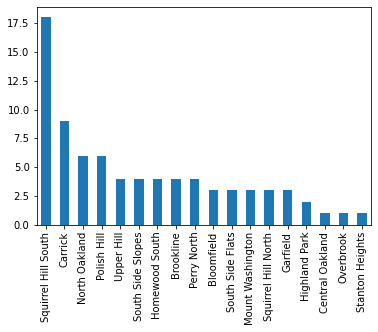

In [5]:
speed_humps["neighborhood"].value_counts().plot.bar()

As we can see here, there is a large disparity with how speed humps are distributed within the cities. Squirrel Hill South has 18 and the next one is 9 (Carrick). There are even some neighborhoods that only have 1. Of course there are many neighborhoods not included within the dataset, but that does not mean that the other neighborhoods do not have speed humps, but simply is not documented within this dataset.

In [6]:
def calculate_distance(lat1, long1, lat2, long2):
    degree = pi/180
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    long1 = radians(long1)
    long2 = radians(long2)
    
    # Haversine formula
    dlon = long2 - long1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. 
    r = 6371
      
    # calculate the result
    return(c * r)

In [7]:
neighborhoods = speed_humps.neighborhood.unique()
averages = []

for n in neighborhoods:
    temp = speed_humps[speed_humps.neighborhood == n]
    total = 0
    total_sum = 0
    for i in range(0, len(temp)):
        for t in range(i, len(temp)):
            total_sum = total_sum + calculate_distance(temp.iloc[i][14], temp.iloc[i][15], temp.iloc[t][14], temp.iloc[t][15])
            total = total + 1
    averages.append(total_sum/total)

[1.2034673514351362, 0.5019251500820173, 0.09455182672527444, 0.05108997345064226, 0.19109948008473723, 0.13335462958669914, 0.1014592687145081, 0.04924590342060651, 0.0, 0.1124683916186141, 0.0920119214404537, 0.07147158148248359, 0.4479519174670395, 0.1031054926786166, 0.11867733996623295, 0.1636259935282722, 0.0, 0.0]


In [19]:
averages, neighborhoods = zip(*sorted(zip(averages, neighborhoods)))

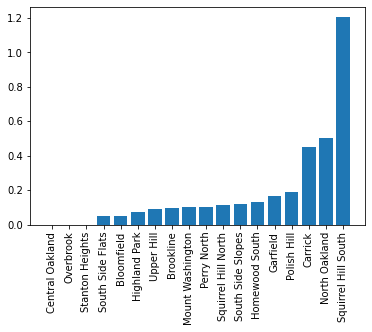

In [20]:
plt.bar(neighborhoods, averages)

plt.xticks(rotation=90,
           horizontalalignment="center")
plt.show()

Here are the average distances between all the speed humps. Of course, where there is only 1 speed hump, the average distance is 0. And it seems to basically flip the previous graph, while Squirrel Hill has the highest number of speed humps, it also has the greatest distance between them.

With the data collected of speed humps and comparing the number of speed humps and the average distances between the every speed hump, I was able to determine what neighborhoods would lead to more boosts on a longer time interval which would be best for in real life Mario Kart.

The top 5 neighborhoods I can conclude are the best for this metric are:
1. Squirrel Hill South - with 18 speed humps and the greatest average distance
2. Carrick - with 9 speed humps and a high average distance
3. North Oakland - with 6 speed humps and a high average distance
4. Polish Hills - 6 with a relatively low average distance
5. Southside Slopes - 4 with a relatively low average distance

---

Over all the metrics (Traffic count, Traffic Signs, and Speed Humps), Squirrel Hill South is one of the best neighborhoods. It is ranked first for the Speed Humps metric, but still within the top five for the other metrics. These metrics will lead to various difficulties, as the driver will need to be aware of the traffic as well as various signs, and be on the lookout for the many boosts around Squirrel Hill South.

![finish](https://media.giphy.com/media/uBXRE9SMlVWmY/giphy.gif)